In [ ]:
!pip install feature_engine -q

In [35]:
!pip install category_encoders -q

# imports

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split
#from feature_engine.encoding import OrdinalEncoder
#from sklearn.preprocessing import OrdinalEncoder
#from sklearn.compose import ColumnTransformer
from category_encoders.ordinal import OrdinalEncoder
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    classification_report
)
import joblib

In [141]:
# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

# read dataframe

In [142]:
path = "../df/train.csv"

df = pd.read_csv(path)
print(df.shape)
df.head(3)

(10000, 16)


,uid,city,description,homeType,latitude,longitude,garageSpaces,hasSpa,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,priceRange
0,1748,austin,MULTIPLE OFFERS submit best & final to Agent b...,Single Family,30.380089,-97.800621,0,False,1988,0,102366.0,7.000000,17,4.0,4,650000+
1,13380,austin,"4644 Hoffman Dr, Austin, TX 78749 is a single ...",Single Family,30.199486,-97.859947,0,False,1997,0,6534.0,6.666667,16,3.0,4,350000-450000
2,4115,austin,"6804 Canal St, Austin, TX 78741 is a single fa...",Single Family,30.227398,-97.696083,0,False,1952,0,5619.0,3.333333,11,1.0,2,0-250000


# Feature selection and engineering

In [143]:
df.dtypes

uid                             int64
city                           object
description                    object
homeType                       object
latitude                      float64
longitude                     float64
garageSpaces                    int64
hasSpa                           bool
yearBuilt                       int64
numOfPatioAndPorchFeatures      int64
lotSizeSqFt                   float64
avgSchoolRating               float64
MedianStudentsPerTeacher        int64
numOfBathrooms                float64
numOfBedrooms                   int64
priceRange                     object
dtype: object

In [144]:
df['description'].unique()

array(['MULTIPLE OFFERS submit best & final to Agent by Mon 21st - 5pm. Appt with Agent.  RARE PANORAMIC VIEW LOT IN JESTER ESTATES SEE FOR MILES!!  Home sits on Cul-de-sac & backs to a Preserve.  Stunning remodeled Kitchen & Bathrooms. Master suite is a private sanctuary with chic master bath, huge bedroom, walk-in closet & private deck.  Jester has a pool, park, tennis courts & feeds into Anderson High.  This home has been well loved & features 3 living areas, an office, & 3 car garage.',
       '4644 Hoffman Dr, Austin, TX 78749 is a single family home that contains 2,059 sq ft and was built in 1997. It contains 4 bedrooms and 3 bathrooms. \r\n \r\n',
       '6804 Canal St, Austin, TX 78741 is a single family home that contains 832 sq ft and was built in 1952. It contains 2 bedrooms and 1 bathroom. \r\n \r\n',
       ...,
       '7322 Gaines Mill Ln, Austin, TX 78745 is a single family home that contains 1,779 sq ft and was built in 1981. It contains 3 bedrooms and 2 bathrooms. \r\n

In [145]:
df['city'].unique()

array(['austin', 'pflugerville', 'del valle', 'manchaca',
       'dripping springs', 'west lake hills', 'driftwood'], dtype=object)

In [146]:
df['homeType'].unique()

array(['Single Family', 'Multiple Occupancy', 'Condo', 'Apartment',
       'MultiFamily', 'Townhouse', 'Other', 'Residential',
       'Mobile / Manufactured', 'Vacant Land'], dtype=object)

In [147]:
df['priceRange'].unique()

array(['650000+', '350000-450000', '0-250000', '450000-650000',
       '250000-350000'], dtype=object)

In [148]:
df.drop(columns=["uid", "description"], axis=1, inplace=True)
df.head(1)

,city,homeType,latitude,longitude,garageSpaces,hasSpa,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,priceRange
0,austin,Single Family,30.380089,-97.800621,0,False,1988,0,102366.0,7.0,17,4.0,4,650000+


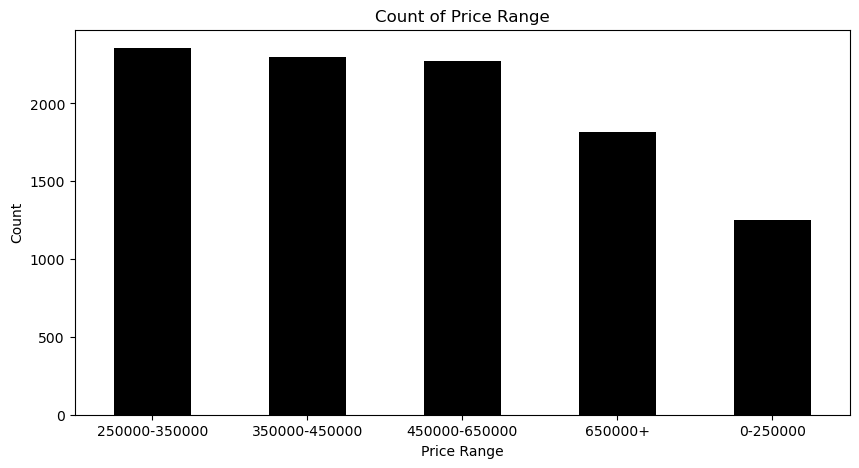

In [149]:
# Conte as ocorrências de cada categoria
count_target = df['priceRange'].value_counts()

# Crie o gráfico de barras para a contagem
plt.figure(figsize=(10, 5))
count_target.plot(kind='bar', color='black')
plt.title('Count of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotação dos rótulos no eixo x, se necessário
plt.show()

In [150]:
df.isnull().any()

city                          False
homeType                      False
latitude                      False
longitude                     False
garageSpaces                  False
hasSpa                        False
yearBuilt                     False
numOfPatioAndPorchFeatures    False
lotSizeSqFt                   False
avgSchoolRating               False
MedianStudentsPerTeacher      False
numOfBathrooms                False
numOfBedrooms                 False
priceRange                    False
dtype: bool

In [151]:
cat_vars = [var for var in df.columns if df[var].dtype == 'O' and var != 'priceRange']
cat_vars

['city', 'homeType']

In [152]:
num_vars = [var for var in df.columns if var not in cat_vars and var != 'priceRange']
num_vars

['latitude',
 'longitude',
 'garageSpaces',
 'hasSpa',
 'yearBuilt',
 'numOfPatioAndPorchFeatures',
 'lotSizeSqFt',
 'avgSchoolRating',
 'MedianStudentsPerTeacher',
 'numOfBathrooms',
 'numOfBedrooms']

In [153]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]#isnull() true or false
vars_with_na

[]

In [155]:
df['hasSpa'] = df['hasSpa'].replace({True: 1, False: 0})
df.head(1)

,city,homeType,latitude,longitude,garageSpaces,hasSpa,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,priceRange
0,austin,Single Family,30.380089,-97.800621,0,0,1988,0,102366.0,7.0,17,4.0,4,650000+


In [156]:
# Defina um dicionário de mapeamento de categorias para números
mapping = {'0-250000': 0, '250000-350000': 1, '350000-450000': 2, '450000-650000': 3, '250000-350000': 4, '650000+': 5}

# Use a função map para remapear a coluna 'Categoria' para valores numéricos
df['priceRange'] = df['priceRange'].map(mapping)

In [157]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['priceRange'], axis=1), # predictive variables
    df['priceRange'], # target
    test_size=0.3, # portion of dataset to allocate to test set
    random_state=0, # we are setting the seed here
)

X_train.shape, X_test.shape

((7000, 13), (3000, 13))

In [158]:
# set up the encoder
#cat_encoder = OrdinalEncoder(encoding_method='ordered', variables=cat_vars)

# create the mappings
#cat_encoder.fit(X_train, y_train)

# mappings are stored and class can be saved
#cat_encoder.encoder_dict_

In [159]:
ordinal_enc = OrdinalEncoder(
    cols=cat_vars,
)

ordinal_enc.fit(X_train)

OrdinalEncoder(cols=['city', 'homeType'],
               mapping=[{'col': 'city', 'data_type': dtype('O'),
                         'mapping': austin              1
driftwood           2
del valle           3
pflugerville        4
dripping springs    5
west lake hills     6
manchaca            7
NaN                -2
dtype: int64},
                        {'col': 'homeType', 'data_type': dtype('O'),
                         'mapping': Single Family            1
Condo                    2
Townhouse                3
Multiple Occupancy       4
Residential              5
MultiFamily              6
Apartment                7
Mobile / Manufactured    8
Vacant Land              9
NaN                     -2
dtype: int64}])

In [160]:
# we are happy to our model, so we save it to be able
# to score new data

path_ordinal_encoder_model = '../models/ordinal_encoder_model.joblib'
joblib.dump(ordinal_enc, path_ordinal_encoder_model) 

['../models/ordinal_encoder_model.joblib']

In [161]:
# in the mapping we can observe the numbers
# assigned to each category for all the indicated variables
ordinal_enc.mapping

[{'col': 'city',
  'mapping': austin              1
  driftwood           2
  del valle           3
  pflugerville        4
  dripping springs    5
  west lake hills     6
  manchaca            7
  NaN                -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'homeType',
  'mapping': Single Family            1
  Condo                    2
  Townhouse                3
  Multiple Occupancy       4
  Residential              5
  MultiFamily              6
  Apartment                7
  Mobile / Manufactured    8
  Vacant Land              9
  NaN                     -2
  dtype: int64,
  'data_type': dtype('O')}]

In [162]:
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

In [163]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)

In [164]:
path_clf_model = '../models/clf_model.joblib'
joblib.dump(clf, path_clf_model) 

['../models/clf_model.joblib']

# Metrics

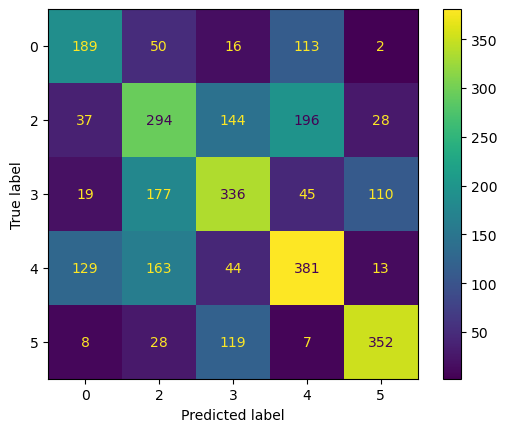

In [165]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

In [166]:
# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', classification_rep)


Accuracy: 0.52
Precision: 0.52
Recall: 0.52
F1 Score: 0.52

Confusion Matrix:
 [[189  50  16 113   2]
 [ 37 294 144 196  28]
 [ 19 177 336  45 110]
 [129 163  44 381  13]
 [  8  28 119   7 352]]

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.51      0.50       370
           2       0.41      0.42      0.42       699
           3       0.51      0.49      0.50       687
           4       0.51      0.52      0.52       730
           5       0.70      0.68      0.69       514

    accuracy                           0.52      3000
   macro avg       0.53      0.53      0.53      3000
weighted avg       0.52      0.52      0.52      3000



In [169]:
# Obtenha a importância das features
feature_importance = clf.feature_importances_

# Crie um DataFrame para exibir as importâncias das features
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importância': feature_importance})

# Exiba o DataFrame com as importâncias das features
print(feature_importance_df)


                       Feature  Importância
0                         city     0.000702
1                     homeType     0.009035
2                     latitude     0.219034
3                    longitude     0.173228
4                 garageSpaces     0.039104
5                       hasSpa     0.010331
6                    yearBuilt     0.111732
7   numOfPatioAndPorchFeatures     0.040085
8                  lotSizeSqFt     0.154764
9              avgSchoolRating     0.099574
10    MedianStudentsPerTeacher     0.022435
11              numOfBathrooms     0.083605
12               numOfBedrooms     0.036372


# Score New Data

In [135]:
from pipeline import pipeline

In [136]:
path = "../df/train.csv"
df = pd.read_csv(path)

In [137]:
new_input = pd.DataFrame(df.iloc[0]).transpose()
new_input

,uid,city,description,homeType,latitude,longitude,garageSpaces,hasSpa,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,priceRange
0,1748,austin,MULTIPLE OFFERS submit best & final to Agent b...,Single Family,30.380089,-97.800621,0,False,1988,0,102366.0,7.0,17,4.0,4,650000+


In [138]:
new_result = pipeline(new_input)
new_result[0]

5

In [120]:
#new_input.drop(columns=["uid", "description", "priceRange"], axis=1, inplace=True)

In [121]:
#ordinal_encoder_model = joblib.load(path_ordinal_encoder_model)
#clf_model = joblib.load(path_clf_model)

In [124]:
#new_input = ordinal_encoder.transform(new_input)
#new_pred = clf_model.predict(new_input)
#new_pred

array([5], dtype=int64)

In [ ]:
path_ordinal_encoder = '../models/ordinal_encoder.joblib'
joblib.dump(ordinal_enc, path_ordinal_encoder) 

In [ ]:
path_clf = '../models/clf_model.joblib'
joblib.dump(clf, path_clf) 

In [57]:
X_train.head(5)

,city,homeType,latitude,longitude,garageSpaces,hasSpa,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms
7681,1,1,30.209854,-97.869225,0,1,1997,0,8537.0,8.000000,17,2.0,3
9031,1,1,30.450420,-97.778938,2,0,1980,1,14374.8,5.333333,12,2.0,3
3691,1,1,30.424562,-97.680000,0,0,2001,1,6272.0,4.333333,13,2.0,4
202,1,1,30.263128,-97.627541,2,0,1998,1,12196.8,3.666667,11,2.0,3
5625,1,1,30.278431,-97.624786,4,0,2014,0,4599.0,3.666667,11,3.0,3


In [33]:
#cat_vars

['city', 'homeType']

In [ ]:
# let's set up the encoder

#encoder = OrdinalEncoder()

# let's set up the column transformer

#ct = ColumnTransformer(
#    [("oe", encoder, cat_vars)],
#    remainder="passthrough",
#)

#ct.set_output(transform="pandas")

# train the encoder

#ct.fit(X_train)

In [32]:
# set up the encoder
#cat_encoder = OrdinalEncoder(categories=[cat_vars], handle_unknown="use_encoded_value", unknown_value=-1, encoded_missing_value=-1)
#cat_encoder = OrdinalEncoder(categories=[cat_vars])

# create the mappings
#cat_encoder.fit(X_train[cat_vars])

# mappings are stored and class can be saved
#cat_encoder.encoder_dict_

ValueError: Shape mismatch: if categories is an array, it has to be of shape (n_features,).

In [ ]:
X_train = cat_encoder.transform(X_train)
X_test = cat_encoder.transform(X_test)

In [26]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Create a sample DataFrame with an ordinal column
data = {'Education': ['High School', 'Bachelor', 'Master', 'PhD', 'Bachelor', 'Master']}
df_2 = pd.DataFrame(data)

# Define the ordinal categories in the desired order
ordinal_categories = ['High School', 'Bachelor', 'Master', 'PhD']

# Create an instance of OrdinalEncoder with the specified categories
encoder = OrdinalEncoder(categories=[ordinal_categories])

# Fit and transform the encoder on the ordinal column
encoded_values = encoder.fit_transform(df_2[['Education']])

# Replace the original column with the encoded values
df_2['Education_Encoded'] = encoded_values

# Print the resulting DataFrame
print(df)


        city       homeType   latitude  longitude  garageSpaces  hasSpa  \
0     austin  Single Family  30.380089 -97.800621             0       0   
1     austin  Single Family  30.199486 -97.859947             0       0   
2     austin  Single Family  30.227398 -97.696083             0       0   
3     austin  Single Family  30.205469 -97.792351             4       0   
4     austin  Single Family  30.345106 -97.767426             2       0   
...      ...            ...        ...        ...           ...     ...   
9995  austin  Single Family  30.409927 -97.763390             2       0   
9996  austin  Single Family  30.206074 -97.779472             0       0   
9997  austin  Single Family  30.198936 -97.810913             0       0   
9998  austin  Single Family  30.391880 -97.761292             0       0   
9999  austin  Single Family  30.346609 -97.614983             1       0   

      yearBuilt  numOfPatioAndPorchFeatures  lotSizeSqFt  avgSchoolRating  \
0          1988       